# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [77]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1-M17.csv", delimiter=';')

df.head(11)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [44]:
#A) seu código aqui

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [81]:
df['Age'] = df['Age'].astype(int)
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '', regex=False)
df['Income'] = df['Income'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    int32  
 1   Gender              130 non-null    object 
 2   Income              130 non-null    float64
 3   Education           130 non-null    object 
 4   Marital Status      130 non-null    object 
 5   Number of Children  130 non-null    int64  
 6   Home Ownership      130 non-null    object 
 7   Credit Score        130 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 8.6+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

R - Na coluna 'Age' eu optei por apagar os dados nulos pois ela representava apenas 20% da base de dados e como a base possui um tamanho mediano, eu
acredito que essa exclusão não irá interferir no modelo de machine learning.

In [63]:
#seu código aqui

(df.isnull().sum()/len(df))*100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [79]:
df.dropna(subset=['Age'], inplace=True)
(df.isnull().sum()/len(df))*100

Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

R - As variáveis categóricas estão todas corretas e nenhuma precisa de tratamento.

In [12]:
#seu código aqui

df['Gender'].unique()
df['Education'].unique()
df['Marital Status'].unique()
df['Home Ownership'].unique()
df['Credit Score'].unique()

print(df)

     Age  Gender      Income            Education Marital Status  \
0     25  Female   5000000.0    Bachelor's Degree         Single   
1     30    Male  10000000.0      Master's Degree        Married   
2     35  Female   7500000.0            Doctorate        Married   
3     40    Male  12500000.0  High School Diploma         Single   
4     45  Female  10000000.0    Bachelor's Degree        Married   
..   ...     ...         ...                  ...            ...   
159   29  Female   2750000.0  High School Diploma         Single   
160   34    Male   4750000.0   Associate's Degree         Single   
161   39  Female   6250000.0    Bachelor's Degree        Married   
162   44    Male   8750000.0      Master's Degree         Single   
163   49  Female   7750000.0            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
0                     0         Rented         High  
1                     2          Owned         High  
2                    

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

R - Após realizar a análise univariada, eu não encontrei a presença de outliers na base de dados, a não ser na coluna 'Number of Children' mas já seria
esperado pois só existem 4 numeros diferentes nela.

In [10]:
#seu código aqui

df.describe()

,Age,Income,Number of Children
count,130.000000,1.300000e+02,130.000000
mean,37.507692,8.428846e+06,0.661538
std,8.500110,3.306394e+06,0.902656
min,25.000000,2.500000e+06,0.000000
25%,30.000000,5.812500e+06,0.000000
50%,36.000000,8.250000e+06,0.000000
75%,45.000000,1.050000e+07,1.000000
max,53.000000,1.625000e+07,3.000000


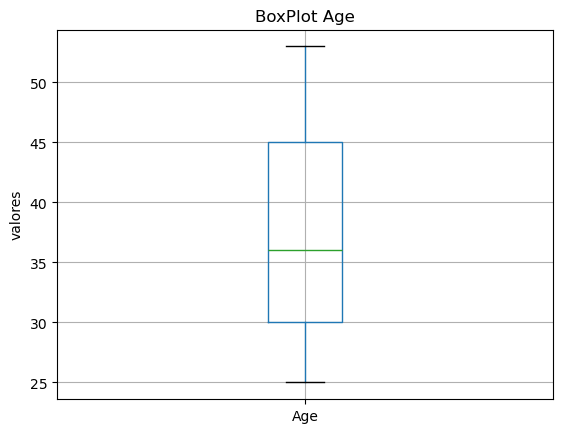

In [64]:
df.boxplot(column='Age')
plt.title('BoxPlot Age')
plt.ylabel('valores')
plt.show()

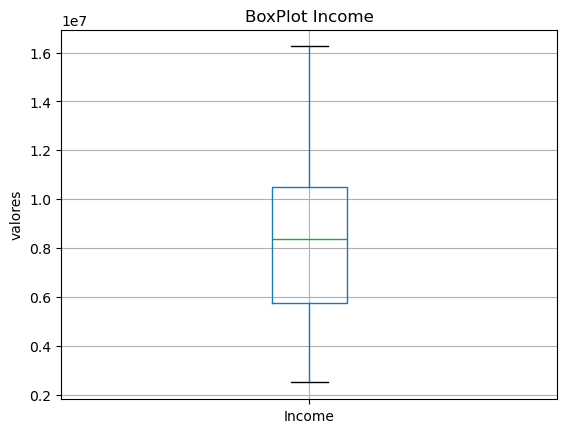

In [126]:
df.boxplot(column='Income')
plt.title('BoxPlot Income')
plt.ylabel('valores')
plt.show()

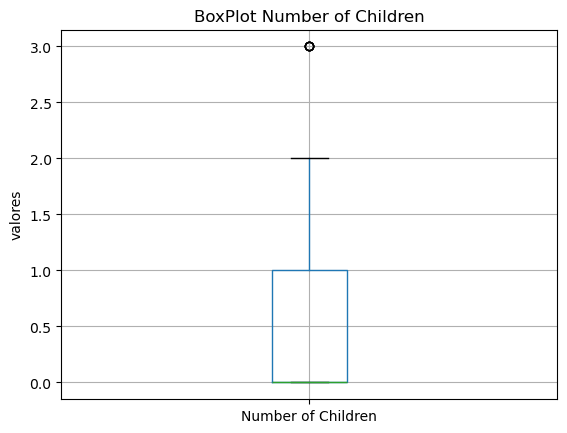

In [129]:
df.boxplot(column='Number of Children')
plt.title('BoxPlot Number of Children')
plt.ylabel('valores')
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

R - Na coluna 'Gender' a base está bem distribuida entre homens e mulheres.

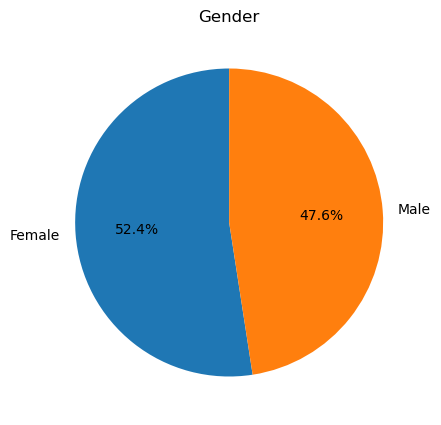

In [136]:
#seu código aqui

x = df['Gender'].value_counts().index
y = df['Gender'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Gender')
plt.show()

R - Em 'Education' a graduação também está bastante equilibrada.

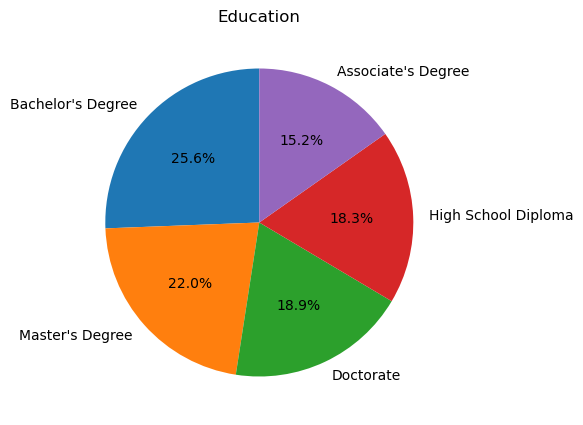

In [138]:
x = df['Education'].value_counts().index
y = df['Education'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Education')
plt.show()

R - No 'Marital Status' a coluna também possui um equilibrio.

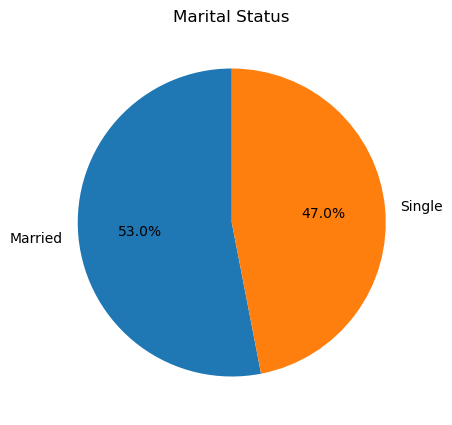

In [140]:
x = df['Marital Status'].value_counts().index
y = df['Marital Status'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Marital Status')
plt.show()

R - Aqui em 'Home Ownership' a coluna ja tende um pouco mais para quem possui casa própria mas nada que desbalencei a nossa base.

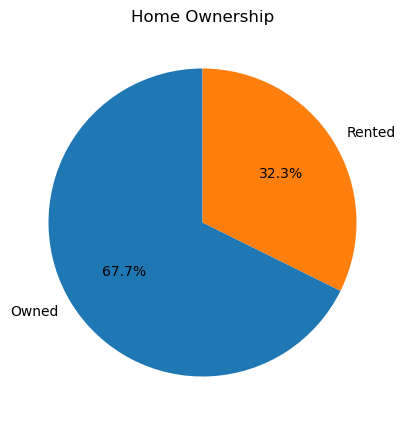

In [146]:
x = df['Home Ownership'].value_counts().index
y = df['Home Ownership'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Home Ownership')
plt.show()

R - já em 'Credit Score' existem muitos clientes com a pontuação alta e poucos com a pontuação baixa, talvez realizando uma análise bivariada entre a 
coluna 'Credit Score' e outras colunas da base seja possivél entender o que levou a esse aumento nos créditos dos clientes.

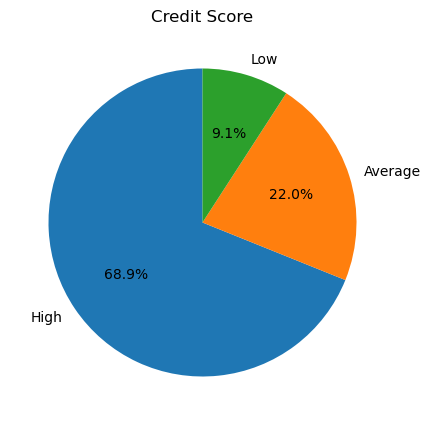

In [148]:
x = df['Credit Score'].value_counts().index
y = df['Credit Score'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Credit Score')
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

#seu código aqui

R - Não foi encontrado nenhuma coluna com outliers na base de dados.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



Existe relação entre a idade e o status civil?

R - O que se percebe é que pessoas mais novas tendem a ser solteiras e as mais velhas casadas porém o fato das pessoas de 40 a 44 anos serem solteiras acaba 
chamando um pouco a atenção.

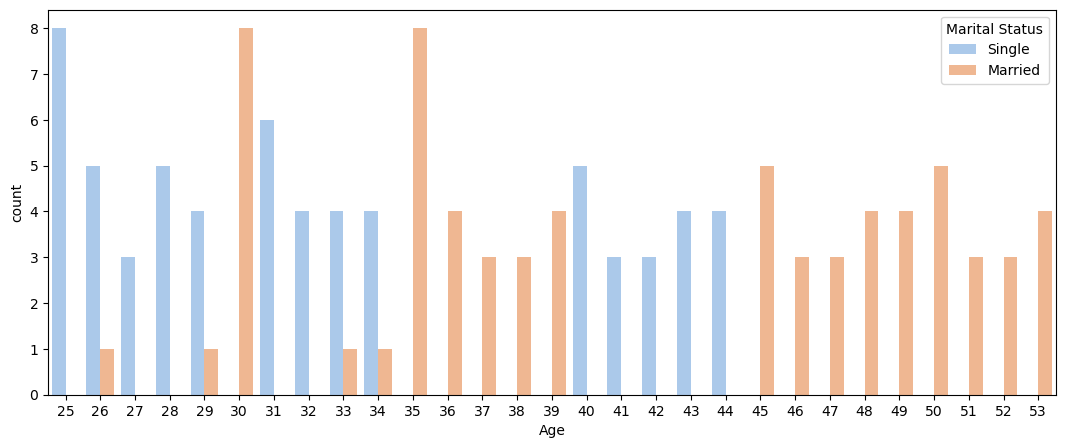

In [66]:
#seu código aqui

plt.figure(figsize=(13,5))
sns.countplot(x='Age', hue='Marital Status', data=df, palette='pastel')
plt.xlabel('Age')
plt.legend(title='Marital Status')
plt.show()

Qual a relação entre a pontuação de crédito e o nível de escolaridade?

R - Através da ánalise do gráfico, foi possivel percerber que as pessoas que possuem uma gradução em bacharelado, mestrado e doutorado conseguiram uma pontuação
de crédito maior do que as outras formações.

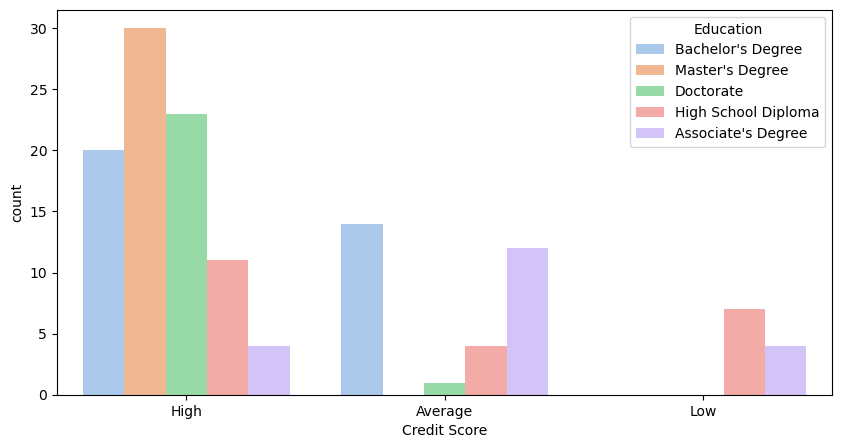

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit Score', hue='Education', data=df, palette='pastel')
plt.xlabel('Credit Score')
plt.legend(title='Education')
plt.show()

O salário parece influenciar na idade?

R - Sim, o sálario parece ter uma certa influencia na idade, algumas pessoas mais velhas possuem um sálario maior do que as pessoas mais novas.

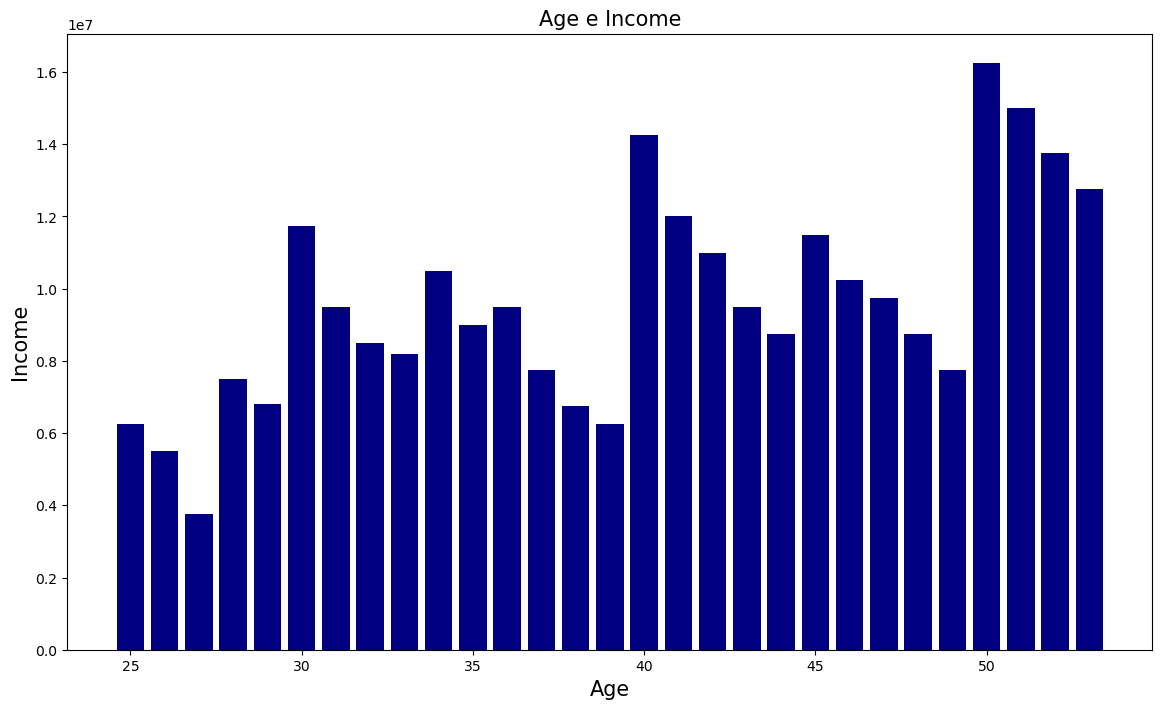

In [70]:
plt.figure(figsize=(14,8))
plt.bar(df['Age'], df['Income'], color='navy')
plt.title('Age e Income', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.xticks(rotation=0)
plt.show()

O salário parece influenciar no Score de Crédito?

R - Sim, as pessoas que possuem um sálario maior também tiveram uma pontuação de crédito alta.

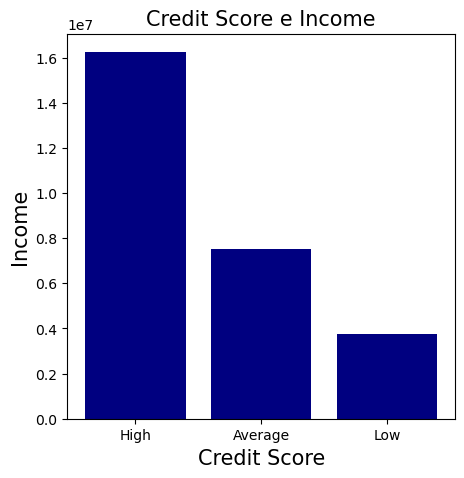

In [224]:
plt.figure(figsize=(5,5))
plt.bar(df['Credit Score'], df['Income'], color='navy')
plt.title('Credit Score e Income', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Clientes com casa própria tendem a ter uma pontuação mais alta?

R - Sim, os clientes que possuem casa própria também possuem um pontuação de crédito alta.

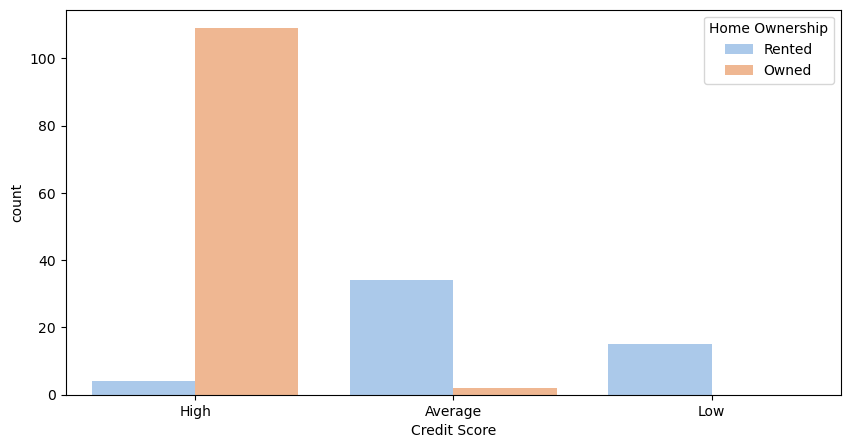

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit Score', hue='Home Ownership', data=df, palette='pastel')
plt.xlabel('Credit Score')
plt.legend(title='Home Ownership')
plt.show()

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

Qual o nivel de escolariade das pessoas que possuem um sálario mais alto?

R - As pessoas com mestrado são as que possuem uma renda maior e pessoas com bacharelado possuem a segunda maior renda, curiosamente pessoas que posuem
doutorado são as que possuem a menor renda.

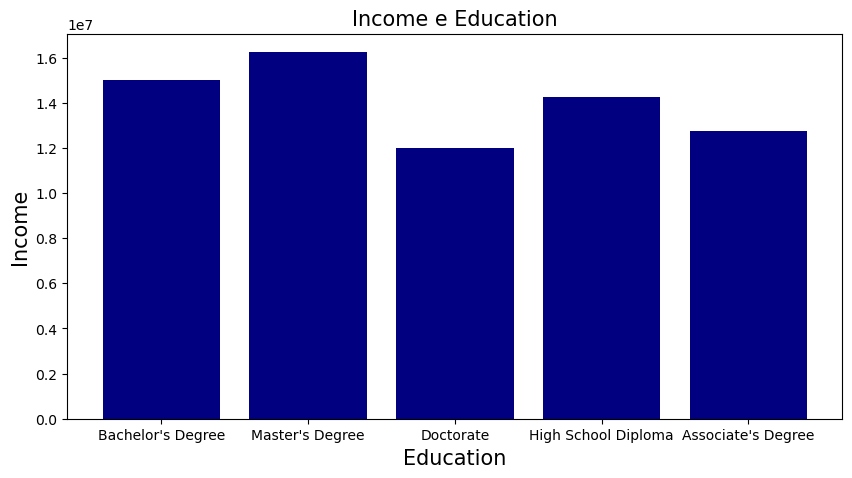

In [97]:
plt.figure(figsize=(10,5))
plt.bar(df['Education'], df['Income'], color='navy')
plt.title('Income e Education', fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Qual genero possui um score de credito mais alto?

R - Os homens possuem uma pontuação de crédito mais alta do que as mulheres.

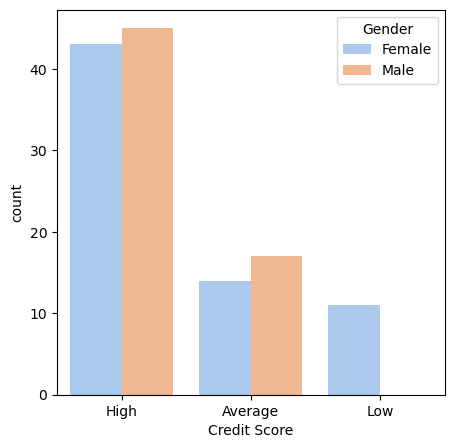

In [114]:
plt.figure(figsize=(5,5))
sns.countplot(x='Credit Score', hue='Gender', data=df, palette='pastel')
plt.xlabel('Credit Score')
plt.legend(title='Gender')
plt.show()

Qual a distribuição da educação por gênero?

R - A maioria dos homens possuem formação em mestrado enquanto que a maioria das mulheres possuem formação em bacharel. Um outro ponto a se notar é que a existem muito mais mulheres
formadas em doutorado do que homens e no gráfico anterior foi possivél ver que a formação em doutorado possue a renda mais baixa de todas.

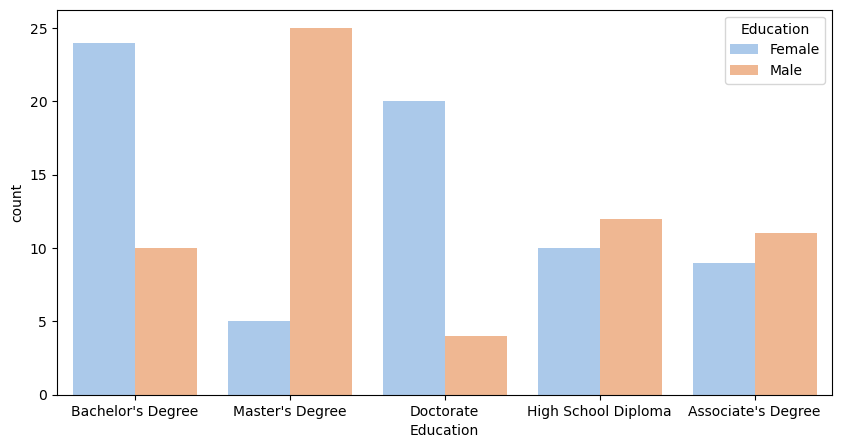

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='Gender', data=df, palette='pastel')
plt.xlabel('Education')
plt.legend(title='Education')
plt.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [18]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.685213,0.078137
Income,0.685213,1.000000,0.114724
Number of Children,0.078137,0.114724,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

# sua justificativa aqui

R - A variável Age e Income possuem uma correlação positiva de 0.68% e essas variavés estarem correlacionadas faz o total sentindo pra mim, no gráfico que eu plotei acima entre essas duas
variáveis foi possivel ver que quanto maior é a idade, maior também é a renda.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [83]:
#seu código aqui
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
ordem = [["High School Diploma", "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Doctorate"]]
ordinal_encoder = OrdinalEncoder(categories=ordem)
df["Education_encoded"] = ordinal_encoder.fit_transform(df[["Education"]])
df['MaritaStatus_encoded'] = label_encoder.fit_transform(df['Marital Status'])
df['HomeOwnership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])
ordem = [["Low", "Average", "High"]]
ordinal_cod = OrdinalEncoder(categories=ordem)
df['CreditScore_encoded'] = ordinal_cod.fit_transform(df[['Credit Score']])
df['Education_encoded'] = df['Education_encoded'].astype(int)
df['CreditScore_encoded'] = df['CreditScore_encoded'].astype(int)

df = df.drop(['Gender'], axis=1)
df = df.drop(['Education'], axis=1)
df = df.drop(['Marital Status'], axis=1)
df = df.drop(['Home Ownership'], axis=1)
df = df.drop(['Credit Score'], axis=1)

df.head(11)

,Age,Income,Number of Children,Gender_encoded,Education_encoded,MaritaStatus_encoded,HomeOwnership_encoded,CreditScore_encoded
0,25,5000000.0,0,0,2,1,1,2
1,30,10000000.0,2,1,3,0,0,2
2,35,7500000.0,1,0,4,0,0,2
3,40,12500000.0,0,1,0,1,0,2
4,45,10000000.0,3,0,2,0,0,2
5,50,15000000.0,0,1,3,0,0,2
6,26,4000000.0,0,0,1,1,1,1
7,31,6000000.0,0,1,2,1,1,1
21,43,8000000.0,0,1,3,1,0,2
22,48,7000000.0,1,0,4,0,0,2


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

R - No mapa de calor podemos ver uma forte correlação entre Age e Home Ownership, Income e Home Ownership, Income e Credit Score, Number of Children e 
Marita Status, Marita Status e Home Ownership, Home Ownership e Credit Score, neste gráfico eu considerei uma forte correlação as variáveis acima de 0.70% e -0.70%.

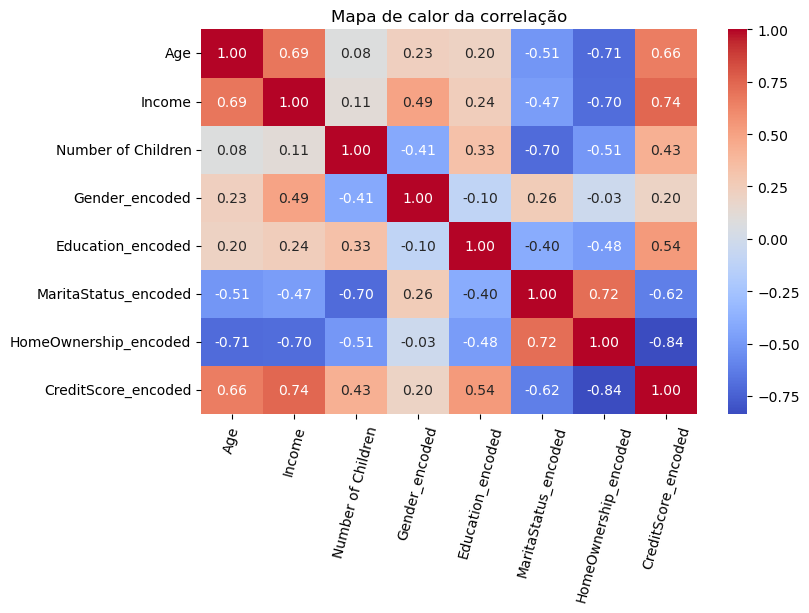

In [110]:
#seu código aqui

matrix = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [119]:
#seu código aqui
from sklearn.model_selection import train_test_split

x = df.drop('CreditScore_encoded', axis=1)
y = df['CreditScore_encoded']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [125]:
x_train.shape

(97, 7)

In [127]:
x_test.shape

(33, 7)

In [129]:
y_train.shape

(97,)

In [131]:
y_test.shape

(33,)

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

R - A coluna de Credit Score não está balanceada, ela possuem muitos clientes com o Crédito muito alto.

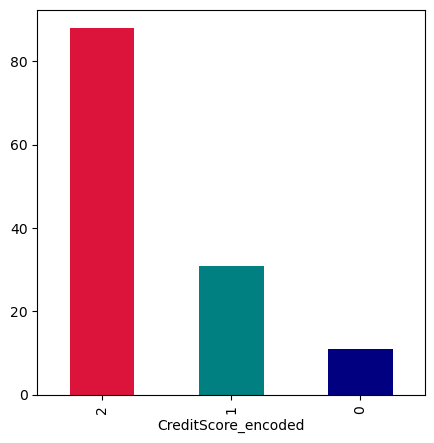

In [163]:
#seu código aqui
CreditScore = df['CreditScore_encoded'].value_counts()
plt.figure(figsize=(5,5))
CreditScore.plot(kind='bar', color=['crimson', 'teal', 'navy'])
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [167]:
#seu código aqui
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
y_train_balanced.value_counts()


CreditScore_encoded
2    67
1    67
0    67
Name: count, dtype: int64

In [169]:
x_train_balanced.to_csv('x_train_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)